### Hierarchical Clustering | Agglomerative Clustering

In [1]:
import pandas as pd

In [2]:
# Reading the data
data = pd.read_csv('crime_data.csv', index_col=0)
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


### Scaling the data

In [4]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_data = pd.DataFrame(Scaler.fit_transform(data), index = data.index, columns=data.columns )
scaled_data[:5]

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


### Building the model 

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [17]:
hier_model_scores = {}
for i in range(2,11):
    # Using 'Single' linkage
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_)
    hier_model_scores.update({i:score})
    
hier_model_scores

{2: 0.23455598753159795,
 3: 0.14582343625170263,
 4: 0.174058063042673,
 5: 0.21127138005172738,
 6: 0.15038419906489478,
 7: 0.14569917236367297,
 8: -0.031850582164404256,
 9: 0.119031054793955,
 10: 0.13947806156459552}

In [21]:
hier_model_scores_1 = {}
for i in range(2,11):
    # Using Ward linkage
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_)
    hier_model_scores_1.update({i:score})
    
hier_model_scores_1

{2: 0.4047944502519567,
 3: 0.31036358174027895,
 4: 0.3370187183556962,
 5: 0.2731109448720741,
 6: 0.26171267541168186,
 7: 0.26025035419230624,
 8: 0.2637495890512364,
 9: 0.2550961558363565,
 10: 0.2556049686435773}

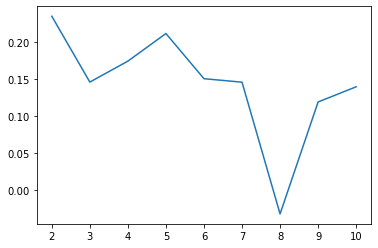

In [23]:
# Plotting silhouette scores for single linkage method
from matplotlib import pyplot as plt

#plt.figure(figsize=(8,8))
plt.plot(hier_model_scores.keys(), hier_model_scores.values())
plt.show()


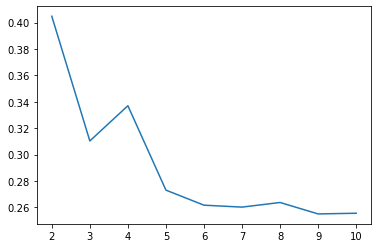

In [22]:
# Plotting silhouette scores for ward linkage method
from matplotlib import pyplot as plt

#plt.figure(figsize=(8,8))
plt.plot(hier_model_scores_1.keys(), hier_model_scores_1.values())
plt.show()


### Hence will go with clusters = 2 as an optimum no. of clusters as Silhouette Score is maximum for this value and linkage method = 'ward' (0.404) instead of 'single' linkage (0.235). 

In [24]:
model_hierarchical = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
model_hierarchical

AgglomerativeClustering()

In [25]:
model_hierarchical.fit(scaled_data)

AgglomerativeClustering()

In [26]:
model_hierarchical.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
data['hierarchy_clusterId'] = model_hierarchical.fit_predict(scaled_data)
data.head()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [28]:
data.groupby(['hierarchy_clusterId']).count()

,Murder,Assault,UrbanPop,Rape
hierarchy_clusterId,,,,
0,31,31,31,31
1,19,19,19,19


In [29]:
data.groupby(['hierarchy_clusterId']).agg(['mean', 'max', 'min'])

Murder                Assault             UrbanPop  \
                          mean   max  min        mean  max  min       mean   
hierarchy_clusterId                                                          
0                     5.003226   9.7  0.8  116.483871  238   45  63.838710   
1                    12.331579  17.4  7.9  259.315789  337  188  68.315789   

                                  Rape              
                    max min       mean   max   min  
hierarchy_clusterId                                 
0                    89  32  16.338710  29.3   7.3  
1                    91  44  29.215789  46.0  16.1

In [31]:
for x,y in data.groupby(['hierarchy_clusterId']):
    print(y)
    print('---------------------------------------------------')

               Murder  Assault  UrbanPop  Rape  hierarchy_clusterId
Arkansas          8.8      190        50  19.5                    0
Connecticut       3.3      110        77  11.1                    0
Delaware          5.9      238        72  15.8                    0
Hawaii            5.3       46        83  20.2                    0
Idaho             2.6      120        54  14.2                    0
Indiana           7.2      113        65  21.0                    0
Iowa              2.2       56        57  11.3                    0
Kansas            6.0      115        66  18.0                    0
Kentucky          9.7      109        52  16.3                    0
Maine             2.1       83        51   7.8                    0
Massachusetts     4.4      149        85  16.3                    0
Minnesota         2.7       72        66  14.9                    0
Missouri          9.0      178        70  28.2                    0
Montana           6.0      109        53  16.4  

In [33]:
models_performance = [('hierarchical',hier_model_scores_1.get(2))]
models_performance

[('hierarchical', 0.4047944502519567)]

## Scatter plot

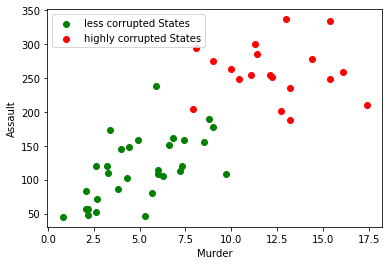

In [88]:
# Plotting scatter plot for all data ppoints taking two variables into account.
import numpy as np

cdict = {0: 'green', 1: 'red'}
labeldict = {0: 'less corrupted States', 1: 'highly corrupted States'}

fig, ax = plt.subplots()
for g in [0,1]:
    ix = np.where(data['hierarchy_clusterId'] == g)
    ax.scatter(data['Murder'].iloc[ix], data['Assault'].iloc[ix], c = cdict[g], label = labeldict[g])
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.legend()
plt.show()

## Dendrogram 

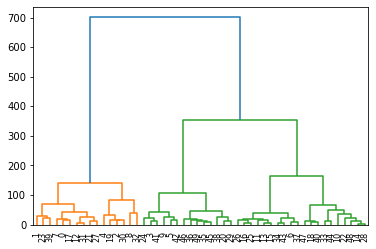

In [52]:
from scipy.cluster import hierarchy

hr = hierarchy.linkage(data, method='ward', metric='euclidean')

dn = hierarchy.dendrogram(hr)

Through Dendorgam as well, it is visible that 2 clusters are optimum as 
we can draw a horizontal line which cuts the longest vertical lines which are the blue ones.

## K-Means Clustering

### Applying hyper parameter tuning | Will choose the best no. of clusters


In [74]:
from sklearn.cluster import KMeans

wcss = {}
silhouette = {}

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_data)
    # inertia is the WCSS (within cluster sum of squares) which we aim to be minimum
    wcss.update({i: model.inertia_})
    #wcss.append(model.inertia_)
    #silhouette.append((i,silhouette_score(scaled_data, model.labels_)))
    silhouette.update({i:silhouette_score(scaled_data, model.labels_)})
    
wcss

{2: 104.96163315756871,
 3: 80.08569526137275,
 4: 57.55425863091104,
 5: 50.33327385184907,
 6: 44.259807638112314,
 7: 40.912667222473445,
 8: 35.695877063333725,
 9: 32.57509993011513,
 10: 29.25349891673461}

In [59]:
silhouette

{2: 0.4084890326217641,
 3: 0.30813622648945616,
 4: 0.33968891433344395,
 5: 0.2892698909578641,
 6: 0.3005771754063692,
 7: 0.2761342454285954,
 8: 0.24606152983626525,
 9: 0.2359060232768202,
 10: 0.2636703762849359}

### Visualizing through elbow plot

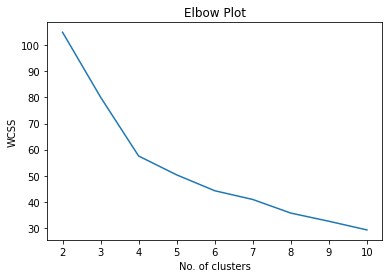

In [60]:
from matplotlib import pyplot as plt

#plt.plot(range(2,11), ([i[1]] for i in wcss))
plt.plot(range(2,11), wcss.values())

plt.title('Elbow Plot')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

 

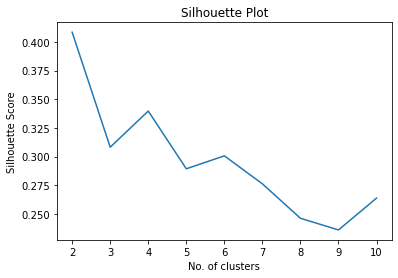

In [70]:
#plt.plot(range(2,11), ([i[1]] for i in wcss))
plt.plot(range(2,11), silhouette.values())

plt.title('Silhouette Plot')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')
plt.show()

 

### Hence, will go with optimum no. of clusters = 4 according to elbow method. And Silhouette Score doesn't vary much between the choice of 2(0.40) and 4(0.34) no. of clusters. 

In [61]:
model_Kmeans = KMeans(n_clusters=4, random_state=42)

data['K-Means-clusterId'] = model_Kmeans.fit_predict(scaled_data)


In [62]:
# Labels given to each datapoint by the model
model_Kmeans.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [63]:
for x,y in data.groupby(['K-Means-clusterId']):
    print(y)
    print('------------------------------------------------------------------')

               Murder  Assault  UrbanPop  Rape  hierarchy_clusterId  \
Connecticut       3.3      110        77  11.1                    0   
Delaware          5.9      238        72  15.8                    0   
Hawaii            5.3       46        83  20.2                    0   
Indiana           7.2      113        65  21.0                    0   
Kansas            6.0      115        66  18.0                    0   
Massachusetts     4.4      149        85  16.3                    0   
New Jersey        7.4      159        89  18.8                    0   
Ohio              7.3      120        75  21.4                    0   
Oklahoma          6.6      151        68  20.0                    0   
Oregon            4.9      159        67  29.3                    0   
Pennsylvania      6.3      106        72  14.9                    0   
Rhode Island      3.4      174        87   8.3                    0   
Utah              3.2      120        80  22.9                    0   
Virgin

In [64]:
# Analysing the characteristics of each cluster
data.groupby(['K-Means-clusterId']).agg(['mean','max','min'])

Murder                Assault             UrbanPop      \
                        mean   max  min        mean  max  min       mean max   
K-Means-clusterId                                                              
0                   5.656250   8.5  3.2  138.875000  238   46  73.875000  89   
1                  13.937500  17.4  8.8  243.625000  337  188  53.750000  66   
2                  10.815385  15.4  7.9  257.384615  335  178  76.000000  91   
3                   3.600000   9.7  0.8   78.538462  120   45  52.076923  66   

                            Rape             hierarchy_clusterId          
                  min       mean   max   min                mean max min  
K-Means-clusterId                                                         
0                  60  18.781250  29.3   8.3            0.000000   0   0  
1                  44  21.412500  26.9  16.1            0.875000   1   0  
2                  48  33.192308  46.0  24.0            0.923077   1   0  
3                  32  12.176923  16.5   7.3            0.000000   0   0

In [65]:
data.groupby(['K-Means-clusterId']).count()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId
K-Means-clusterId,,,,,
0,16,16,16,16,16
1,8,8,8,8,8
2,13,13,13,13,13
3,13,13,13,13,13


In [66]:
# Performance of the model | Range is from -1 to +1. It should be maximum and near to 1. 
# It is definately better than hierarchical clustering
score = silhouette_score(scaled_data, model_Kmeans.labels_)
score


0.33968891433344395

In [67]:
# storing the performances of each clustering algorithm
models_performance.append(('K-Means',score))
models_performance

[('hierarchical', 0.4047944502519567), ('K-Means', 0.33968891433344395)]

In [68]:
# wcss for the model (Within cluster sum of squares) | should be minimum
model_Kmeans.inertia_

57.55425863091104

In [83]:
data.head()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId,K-Means-clusterId
Alabama,13.2,236,58,21.2,1,1
Alaska,10.0,263,48,44.5,1,2
Arizona,8.1,294,80,31.0,1,2
Arkansas,8.8,190,50,19.5,0,1
California,9.0,276,91,40.6,1,2


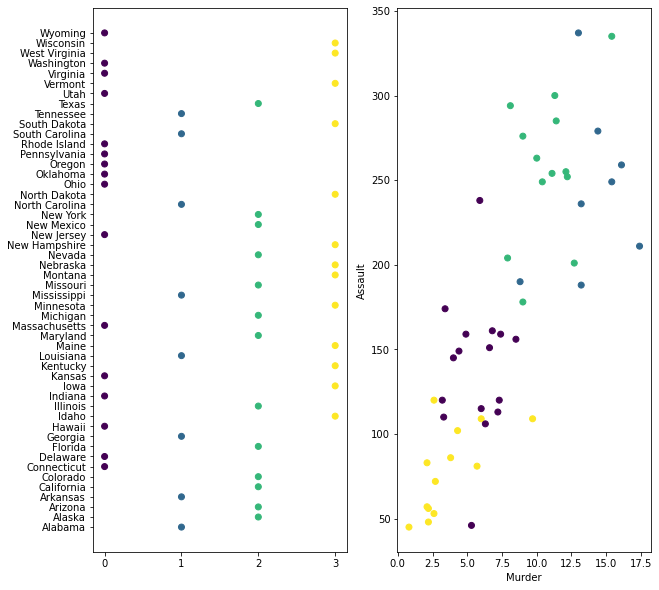

In [87]:
# Plotting all data points corresponding to 3 clusters
fig, ax = plt.subplots(1,2, figsize=(10,10))
#plt.figure(figsize=(5,10))
ax[0].scatter(data['K-Means-clusterId'], data.index, c=data['K-Means-clusterId'])
ax[0].set_xticks([0,1,2,3])

ax[1].scatter(data['Murder'], data['Assault'], c=data['K-Means-clusterId'])
ax[1].set_xlabel('Murder')
ax[1].set_ylabel('Assault')

plt.show()

As per the statistics of each cluster, states of cluster 3 are the most safest states as compared to the states in other clusters. 

## DB Scan Clustering

In [31]:
data.head()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId,K-Means-clusterId
Alabama,13.2,236,58,21.2,0,1
Alaska,10.0,263,48,44.5,1,2
Arizona,8.1,294,80,31.0,0,2
Arkansas,8.8,190,50,19.5,0,1
California,9.0,276,91,40.6,0,2


In [121]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

# choosing minPts=8, double the size of parameters.
# epsilon = 0.5 = no cluster formed
# epsilon = 1.0 = A cluster formed containing 18 data points
# epsilon = 1.5 = A cluster formed of all data points except 2.
model_dbscan = DBSCAN(eps=1.5, min_samples=8)
model_dbscan.fit_predict(scaled_data)
model_dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

### After using different values of epsilon, it is creating only one cluster and marking many points as outliers. As per DBSCAN, there are no high density clusters in this dataset as when I used eps=0.5 and min_samples = 8, all are labelled as -1. When I gradually increased the radius, it is forming only one cluster. 